In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('heart_2022_with_nans.csv')
print(len(data))

445132


In [3]:
tmp = data.dropna()
print(len(tmp))

246022


In [4]:
print(len(data.columns))

40


In [4]:
print(len(data[data['HadHeartAttack'] == 'Yes']))
print(len(tmp[tmp['HadHeartAttack'] == 'Yes']))
print()
print(len(data[data['HadHeartAttack'] == 'No']))
print(len(tmp[tmp['HadHeartAttack'] == 'No']))

25108
13435

416959
232587


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='HadHeartAttack', ylabel='count'>

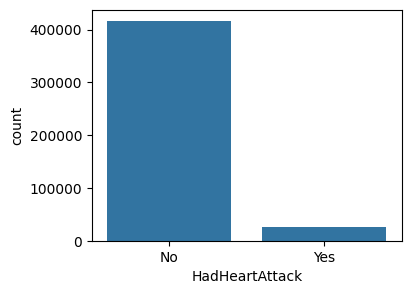

In [6]:
plt.figure(figsize = (4, 3))
sns.countplot(x = 'HadHeartAttack', data = data)

In [7]:
tmp['HeartDisease'] = 0
tmp.loc[tmp['HadHeartAttack'] == 'Yes', 'HeartDisease'] = 1
tmp.loc[tmp['HadAngina'] == 'Yes', 'HeartDisease'] = 1

C:\Users\god12\AppData\Local\Temp\ipykernel_14300\2879740624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['HeartDisease'] = 0


<Axes: xlabel='HeartDisease', ylabel='count'>

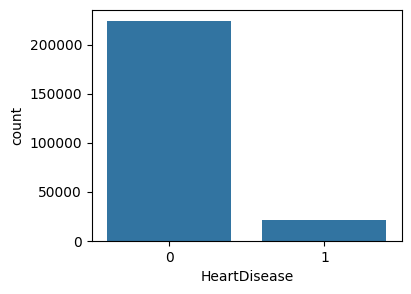

In [8]:
plt.figure(figsize = (4, 3))
sns.countplot(x = 'HeartDisease', data = tmp)

## Random Over Sampler

In [9]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [10]:
X = tmp.drop(['HadHeartAttack', 'HadAngina', 'HeartDisease'], axis = 1)
y = tmp['HeartDisease']

In [12]:
print('Original Dataset shape %s' % Counter(y))
ros = RandomOverSampler(random_state = 1234)
X_ros, y_ros = ros.fit_resample(X, y)
print('Resampled Dataset shape %s' % Counter(y_ros))

Original Dataset shape Counter({0: 224406, 1: 21616})
Resampled Dataset shape Counter({0: 224406, 1: 224406})


In [19]:
rosDF = pd.concat([X_ros, y_ros], axis = 1)
rosDF.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadStroke,...,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,HeartDisease
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No,0
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,0
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,0
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,0
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No,0


In [21]:
tmp_yes = tmp[tmp['HeartDisease'] == 1]
ros_yes = rosDF[rosDF['HeartDisease'] == 1]
print(tmp_yes.duplicated().sum())
print(ros_yes.duplicated().sum())

0
202790


## SMOTE

In [13]:
from imblearn.over_sampling import SMOTE

In [24]:
temp = tmp.copy()

In [29]:
temp.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,HeartDisease
342,Alabama,Female,3.0,4.0,0.0,0.0,Yes,9.0,0.0,No,...,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No,0
343,Alabama,Male,3.0,0.0,0.0,0.0,Yes,6.0,0.0,No,...,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,0
345,Alabama,Male,3.0,0.0,0.0,0.0,No,8.0,2.0,No,...,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,0
346,Alabama,Female,1.0,5.0,0.0,0.0,Yes,9.0,0.0,No,...,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,0
347,Alabama,Female,2.0,3.0,15.0,0.0,Yes,5.0,1.0,No,...,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No,0


In [30]:
temp = temp.drop(['State'], axis = 1)
temp.loc[temp['Sex'] == 'Female', 'Sex'] = 0
temp.loc[temp['Sex'] == 'Male', 'Sex'] = 1

#General Health encoding
temp.loc[temp["GeneralHealth"] == "Poor","GeneralHealth"] = 0
temp.loc[temp["GeneralHealth"] == "Fair","GeneralHealth"] = 1
temp.loc[temp["GeneralHealth"] == "Good","GeneralHealth"] = 2
temp.loc[temp["GeneralHealth"] == "Very good","GeneralHealth"] = 3
temp.loc[temp["GeneralHealth"] == "Excellent","GeneralHealth"] = 4
temp["GeneralHealth"] = temp["GeneralHealth"].astype('float')

#Last check up time encoding
temp.loc[temp["LastCheckupTime"] == "Within past year (anytime less than 12 months ago)","LastCheckupTime"] = 0
temp.loc[temp["LastCheckupTime"] == "Within past 2 years (1 year but less than 2 years ago)","LastCheckupTime"] = 1
temp.loc[temp["LastCheckupTime"] == "Within past 5 years (2 years but less than 5 years ago)","LastCheckupTime"] = 2
temp.loc[temp["LastCheckupTime"] == "5 or more years ago","LastCheckupTime"] = 3
temp["LastCheckupTime"] = temp["LastCheckupTime"].astype('float')

#SmokerStatus
temp.loc[temp["SmokerStatus"] == "Never smoked","SmokerStatus"] = 0
temp.loc[temp["SmokerStatus"] == "Former smoker","SmokerStatus"] = 1
temp.loc[temp["SmokerStatus"] == "Current smoker - now smokes some days","SmokerStatus"] = 2
temp.loc[temp["SmokerStatus"] == "Current smoker - now smokes every day","SmokerStatus"] = 3
temp["SmokerStatus"] = temp["SmokerStatus"].astype('float')


#ECigaretteUsage
temp.loc[temp["ECigaretteUsage"] == "Never used e-cigarettes in my entire life","ECigaretteUsage"] = 0
temp.loc[temp["ECigaretteUsage"] == "Not at all (right now)","ECigaretteUsage"] = 1
temp.loc[temp["ECigaretteUsage"] == "Use them some days","ECigaretteUsage"] = 2
temp.loc[temp["ECigaretteUsage"] == "Use them every day","ECigaretteUsage"] = 3
temp["ECigaretteUsage"] = temp["ECigaretteUsage"].astype('float')


#RemovedTeeth
temp.loc[temp["RemovedTeeth"] == "None of them","RemovedTeeth"] = 0
temp.loc[temp["RemovedTeeth"] == "1 to 5","RemovedTeeth"] = 1
temp.loc[temp["RemovedTeeth"] == "6 or more, but not all","RemovedTeeth"] = 2
temp.loc[temp["RemovedTeeth"] == "All","RemovedTeeth"] = 3
temp["RemovedTeeth"] = temp["RemovedTeeth"].astype('float')

In [38]:
temp = pd.get_dummies(temp, columns = ['RaceEthnicityCategory', 'TetanusLast10Tdap'])

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for columns in temp.select_dtypes(include=[object, bool]).columns:
    temp[columns] = le.fit_transform(temp[columns])

In [40]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246022 entries, 342 to 445130
Data columns (total 47 columns):
 #   Column                                                                       Non-Null Count   Dtype  
---  ------                                                                       --------------   -----  
 0   Sex                                                                          246022 non-null  int32  
 1   GeneralHealth                                                                246022 non-null  float64
 2   PhysicalHealthDays                                                           246022 non-null  float64
 3   MentalHealthDays                                                             246022 non-null  float64
 4   LastCheckupTime                                                              246022 non-null  float64
 5   PhysicalActivities                                                           246022 non-null  int32  
 6   SleepHours                     

In [41]:
X = temp.drop(['HadHeartAttack', 'HadAngina', 'HeartDisease'], axis = 1)
y = temp['HeartDisease']

In [43]:
print('Original Dataset shape %s' % Counter(y))
smo = SMOTE(random_state = 1234)
X_smo, y_smo = smo.fit_resample(X, y)
print('Resampled Dataset shape %s' % Counter(y_smo))

Original Dataset shape Counter({0: 224406, 1: 21616})
Resampled Dataset shape Counter({0: 224406, 1: 224406})


In [44]:
smoDF = pd.concat([X_smo, y_smo], axis = 1)
smoDF.head()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadStroke,HadAsthma,...,"RaceEthnicityCategory_Black only, Non-Hispanic",RaceEthnicityCategory_Hispanic,"RaceEthnicityCategory_Multiracial, Non-Hispanic","RaceEthnicityCategory_Other race only, Non-Hispanic","RaceEthnicityCategory_White only, Non-Hispanic","TetanusLast10Tdap_No, did not receive any tetanus shot in the past 10 years","TetanusLast10Tdap_Yes, received Tdap","TetanusLast10Tdap_Yes, received tetanus shot but not sure what type","TetanusLast10Tdap_Yes, received tetanus shot, but not Tdap",HeartDisease
0,0,3.0,4.0,0.0,0.0,1,9.0,0.0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,1,3.0,0.0,0.0,0.0,1,6.0,0.0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,3.0,0.0,0.0,0.0,0,8.0,2.0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,0,1.0,5.0,0.0,0.0,1,9.0,0.0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,0,2.0,3.0,15.0,0.0,1,5.0,1.0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [45]:
smo_yes = smoDF[smoDF['HeartDisease'] == 1]
print(tmp_yes.duplicated().sum())
print(smo_yes.duplicated().sum())

0
309


https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

In [47]:
print('Original Dataset shape %s' % Counter(y))
smo = SMOTE(sampling_strategy = 0.8, random_state = 1234)
X_smo, y_smo = smo.fit_resample(X, y)
print('Resampled Dataset shape %s' % Counter(y_smo))

Original Dataset shape Counter({0: 224406, 1: 21616})
Resampled Dataset shape Counter({0: 224406, 1: 179524})


In [48]:
smoDF = pd.concat([X_smo, y_smo], axis = 1)
smo_yes = smoDF[smoDF['HeartDisease'] == 1]
print(tmp_yes.duplicated().sum())
print(smo_yes.duplicated().sum())

0
214


## SVM-SMOTE

In [49]:
#18min
from imblearn.over_sampling import SVMSMOTE
print('Original Dataset shape %s' % Counter(y))
svms = SVMSMOTE(random_state = 1234)
X_svms, y_svms = svms.fit_resample(X, y)
print('Resampled Dataset shape %s' % Counter(y_svms))

Original Dataset shape Counter({0: 224406, 1: 21616})
Resampled Dataset shape Counter({0: 224406, 1: 224406})


In [50]:
svmsDF = pd.concat([X_svms, y_svms], axis = 1)
svms_yes = svmsDF[svmsDF['HeartDisease'] == 1]
print(svms_yes.duplicated().sum())

385


## SMOTEENN

In [51]:
#6min
from imblearn.combine import SMOTEENN
print('Original Dataset shape %s' % Counter(y))
sme = SMOTEENN(random_state = 1234)
X_sme, y_sme = sme.fit_resample(X, y)
print('Resampled Dataset shape %s' % Counter(y_sme))

Original Dataset shape Counter({0: 224406, 1: 21616})
Resampled Dataset shape Counter({1: 224082, 0: 144675})


In [52]:
smeDF = pd.concat([X_sme, y_sme], axis = 1)
sme_yes = smeDF[smeDF['HeartDisease'] == 1]
print(sme_yes.duplicated().sum())

309


## SMOTETomek

In [53]:
#6min
from imblearn.combine import SMOTETomek
print('Original Dataset shape %s' % Counter(y))
smt = SMOTETomek(random_state = 1234)
X_smt, y_smt = smt.fit_resample(X, y)
print('Resampled Dataset shape %s' % Counter(y_smt))

Original Dataset shape Counter({0: 224406, 1: 21616})
Resampled Dataset shape Counter({0: 224387, 1: 224387})


In [54]:
smtDF = pd.concat([X_smt, y_smt], axis = 1)
smt_yes = smtDF[smtDF['HeartDisease'] == 1]
print(smt_yes.duplicated().sum())

309


## Upsampled

In [55]:
from sklearn.utils import resample
majorityDF = temp[temp['HeartDisease'] == 0]
minorityDF = temp[temp['HeartDisease'] == 1]
minority_upsampled = resample(minorityDF, replace = True, n_samples = 224406)
print(minority_upsampled.duplicated().sum())

202790


## Weights

In [56]:
neg = len(temp[temp['HeartDisease'] == 0])
pos = len(temp[temp['HeartDisease'] == 1])
weight_for_0 = (1 / neg) * (len(temp)) / 2.0
weight_for_1 = (1 / pos) * (len(temp)) / 2.0
class_weight = {0: weight_for_0, 1: weight_for_1}
print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.55
Weight for class 1: 5.69
